In [17]:
from geopy.geocoders import Nominatim
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import urllib.request

In [3]:
start_date=input("ENTER THE START DATE IN FORMAT yyyymmdd ")
end_date=input("ENTER THE START DATE IN FORMAT yyyymmdd ")
address=input("PLEASE ENTER THE PLACE")
nom=Nominatim(user_agent="manuheralagi4@gmail.com")
loc=nom.geocode(address)
if(loc==None):
    print("Invalid address")
    
print(loc.address)
print(loc.latitude)
print(loc.longitude)



ENTER THE START DATE IN FORMAT yyyymmdd 20010101
ENTER THE START DATE IN FORMAT yyyymmdd 20230101
PLEASE ENTER THE PLACEdharwad
Dharwad, Dharawada taluku, Dharwad District, Karnataka, 580001, India
15.4540505
75.0066516


In [4]:

link="https://power.larc.nasa.gov/api/temporal/daily/point?start="+str(start_date)+"&end="+str(end_date)+"&latitude="+str(loc.latitude)+"&longitude="+str(loc.longitude)+"&community=ag&parameters=T2M_MAX%2CT2M_MIN%2CRH2M%2CPRECTOTCORR%2CPS%2CWS10M_RANGE&format=csv&header=true&time-standard=lst"

In [5]:
urllib.request.urlretrieve(link,'w.csv')

('w.csv', <http.client.HTTPMessage at 0x15bbc3cc460>)

In [19]:
x=pd.read_csv(r"./w.csv",skiprows=14)

In [20]:
x

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
0,2001,1,31.35,18.48,71.50,0.27,93.91,3.46
1,2001,2,32.18,14.81,53.69,0.00,94.00,2.70
2,2001,3,32.55,15.19,55.62,0.00,94.05,4.18
3,2001,4,31.95,19.29,53.69,0.00,94.13,4.18
4,2001,5,32.35,18.29,50.19,0.00,94.17,3.77
...,...,...,...,...,...,...,...,...
8031,2022,362,28.52,18.61,84.00,0.20,94.44,2.09
8032,2022,363,27.87,17.00,79.94,0.07,94.55,1.43
8033,2022,364,27.94,16.21,79.56,0.07,94.61,0.96
8034,2022,365,27.94,15.29,73.56,0.00,94.53,1.46


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         8036 non-null   int64  
 1   DOY          8036 non-null   int64  
 2   T2M_MAX      8036 non-null   float64
 3   T2M_MIN      8036 non-null   float64
 4   RH2M         8036 non-null   float64
 5   PRECTOTCORR  8036 non-null   float64
 6   PS           8036 non-null   float64
 7   WS10M_RANGE  8036 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 502.4 KB


In [22]:
x.describe()

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000
mean,2011.501742,183.091215,31.407969,19.494548,66.671620,2.983011,93.929619,3.602179
std,6.345193,105.451624,4.337768,3.141801,19.744351,5.999509,0.256148,1.124903
min,2001.000000,1.000000,21.330000,8.670000,11.190000,0.000000,92.800000,0.690000
25%,2006.000000,92.000000,27.840000,17.330000,49.750000,0.000000,93.740000,2.800000
50%,2012.000000,183.000000,30.130000,20.520000,71.500000,0.130000,93.920000,3.570000
75%,2017.000000,274.000000,34.862500,21.730000,85.000000,3.420000,94.130000,4.380000
max,2023.000000,366.000000,42.170000,26.110000,96.120000,75.440000,94.670000,10.550000


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x.loc[:, ~x.columns.isin(['YEAR',"DOY",])])
print('Scaled df:\n', scaled, '\n', scaled.shape)

Scaled df:
 [[4.80806142e-01 5.62500000e-01 7.10114212e-01 3.57900318e-03
  5.93582888e-01 2.80933063e-01]
 [5.20633397e-01 3.52064220e-01 5.00412104e-01 0.00000000e+00
  6.41711230e-01 2.03853955e-01]
 [5.38387716e-01 3.73853211e-01 5.23136701e-01 0.00000000e+00
  6.68449198e-01 3.53955375e-01]
 ...
 [3.17178503e-01 4.32339450e-01 8.05015895e-01 9.27889714e-04
  9.67914439e-01 2.73833671e-02]
 [3.17178503e-01 3.79587156e-01 7.34369481e-01 0.00000000e+00
  9.25133690e-01 7.80933063e-02]
 [2.97984645e-01 4.35779817e-01 7.21888614e-01 0.00000000e+00
  8.93048128e-01 1.02434077e-01]] 
 (8036, 6)


In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled, test_size = 0.1425, shuffle = False)
x_train, y_train, x_test, y_test = [], [], [], []
for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [25]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.480806,0.562500,0.710114,0.003579,0.593583,0.280933
1,0.520633,0.352064,0.500412,0.000000,0.641711,0.203854
2,0.538388,0.373853,0.523137,0.000000,0.668449,0.353955
3,0.509597,0.608945,0.500412,0.000000,0.711230,0.353955
4,0.528791,0.551606,0.459202,0.000000,0.732620,0.312373
...,...,...,...,...,...,...
6884,0.296065,0.701261,0.915460,0.035127,0.620321,0.174442
6885,0.322937,0.601491,0.871306,0.000133,0.657754,0.061866
6886,0.340691,0.527523,0.824208,0.000000,0.668449,0.217039
6887,0.324856,0.466170,0.802072,0.000000,0.679144,0.234280


In [26]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.520633,0.352064,0.500412,0.000000,0.641711,0.203854
1,0.538388,0.373853,0.523137,0.000000,0.668449,0.353955
2,0.509597,0.608945,0.500412,0.000000,0.711230,0.353955
3,0.528791,0.551606,0.459202,0.000000,0.732620,0.312373
4,0.523033,0.403096,0.353939,0.000000,0.743316,0.206897
...,...,...,...,...,...,...
6884,0.322937,0.601491,0.871306,0.000133,0.657754,0.061866
6885,0.340691,0.527523,0.824208,0.000000,0.668449,0.217039
6886,0.324856,0.466170,0.802072,0.000000,0.679144,0.234280
6887,0.305662,0.488532,0.780054,0.000000,0.668449,0.306288


In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6889, 6), (6889, 6), (1145, 6), (1145, 6))

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [29]:
model = Sequential()
model.add(Dense(8, input_dim = 6, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6))

model.summary()
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [30]:

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 15, shuffle = False)

Epoch 1/100
460/460 [==============================] - 3s 5ms/step - loss: 0.1466 - accuracy: 0.1896 - val_loss: 0.0278 - val_accuracy: 0.4900
Epoch 2/100
460/460 [==============================] - 2s 5ms/step - loss: 0.0222 - accuracy: 0.5934 - val_loss: 0.0241 - val_accuracy: 0.6140
Epoch 3/100
460/460 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.6255 - val_loss: 0.0218 - val_accuracy: 0.6175
Epoch 4/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.6217 - val_loss: 0.0193 - val_accuracy: 0.6096
Epoch 5/100
460/460 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.6297 - val_loss: 0.0167 - val_accuracy: 0.6341
Epoch 6/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0108 - accuracy: 0.7360 - val_loss: 0.0100 - val_accuracy: 0.7773
Epoch 7/100
460/460 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.8530 - val_loss: 0.0066 - val_accuracy: 0.8009

Epoch 58/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.8952 - val_loss: 0.0046 - val_accuracy: 0.8742
Epoch 59/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.8948 - val_loss: 0.0046 - val_accuracy: 0.8751
Epoch 60/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.8945 - val_loss: 0.0046 - val_accuracy: 0.8751
Epoch 61/100
460/460 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.8945 - val_loss: 0.0046 - val_accuracy: 0.8734
Epoch 62/100
460/460 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.8943 - val_loss: 0.0046 - val_accuracy: 0.8742
Epoch 63/100
460/460 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.8946 - val_loss: 0.0046 - val_accuracy: 0.8751
Epoch 64/100
460/460 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.8942 - val_loss: 0.0046 - val_accuracy:

In [31]:
model.save("model.h5")
print("Model Saved to disk")
model = load_model("model.h5")
model.summary()

Model Saved to disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

36/36 [==============================] - 0s 3ms/step


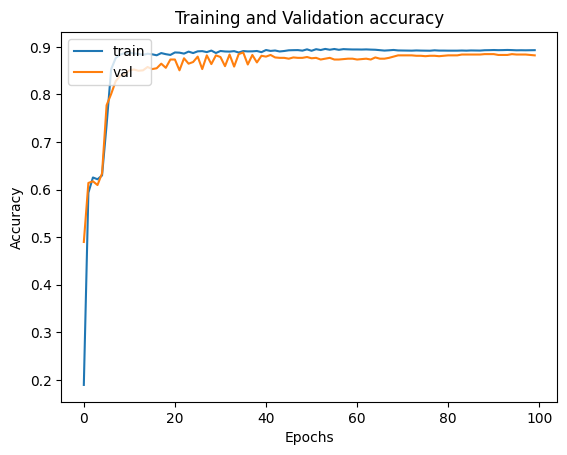

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

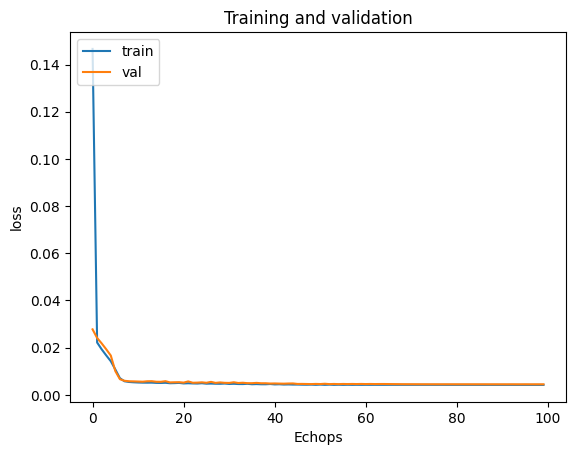

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and validation")
plt.xlabel('Echops')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')

In [35]:
print('Actual values:')
print(' RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE')
print(pd.DataFrame(actual_y_pred))

print('Predicted values:')
print(' PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE')
print(pd.DataFrame(y_pred))

Actual values:
 RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE
          0      1      2     3      4     5
0     26.51  18.26  87.00  0.02  94.22  4.08
1     26.53  18.94  89.62  0.03  94.16  3.32
2     27.28  19.61  86.38  0.05  94.16  3.79
3     26.79  19.47  86.25  0.01  94.23  2.82
4     27.39  17.44  82.56  0.00  94.24  3.23
...     ...    ...    ...   ...    ...   ...
1140  28.52  18.61  84.00  0.20  94.44  2.09
1141  27.87  17.00  79.94  0.07  94.55  1.43
1142  27.94  16.21  79.56  0.07  94.61  0.96
1143  27.94  15.29  73.56  0.00  94.53  1.46
1144  27.54  16.27  72.50  0.00  94.47  1.70

[1145 rows x 6 columns]
Predicted values:
 PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE
              0          1          2         3          4         5
0     27.156363  17.864956  84.974358  3.011052  94.180565  3.679507
1     27.089323  18.040653  85.963394  3.080089  94.171997  3.791084
2     26.977171  18.634235  88.450523  3.362266  94.124336  3.371244
3     27.553802  

In [36]:
score=model.evaluate(actual_y_pred,y_pred,verbose=0)
print("%s:"% model.metrics_names[1],score[1]*100)

accuracy: 97.46724963188171


In [37]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=6, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    results.append((prediction, tt))

36/36 [==============================] - 0s 3ms/step


In [38]:
model.predict(x_train[tt])

36/36 [==============================] - 0s 1ms/step


array([[0.26522171, 0.6464843 , 0.88901234, 0.02636588, 0.5626022 ,
        0.3991469 ],
       [0.23612982, 0.6407576 , 0.9194289 , 0.0975538 , 0.53433007,
        0.29818586],
       [0.24325189, 0.654614  , 0.9026693 , 0.06447308, 0.5393597 ,
        0.36479616],
       ...,
       [0.32946706, 0.52343196, 0.8066973 , 0.01535275, 0.6669542 ,
        0.2356508 ],
       [0.31242642, 0.46943888, 0.7881662 , 0.01239301, 0.67948174,
        0.24716765],
       [0.29861996, 0.48716095, 0.77298695, 0.01412626, 0.66742617,
        0.29338655]], dtype=float32)

In [49]:
inp=[]
a1=float(input("Enter The Max Temperature Value:"))
inp.append(a1)
a2=float(input("Enter The Min Temperature Value:"))
inp.append(a2)
a3=float(input("Enter The Relative humidity Value:"))
inp.append(a3)
a4=float(input("Enter The precipitation Value:"))
inp.append(a4)
a5=float(input("Enter The pressure Value:"))
inp.append(a5)
a1=float(input("Enter The Wind Speed Value:"))
inp.append(a1)

Enter The Max Temperature Value:27.91
Enter The Min Temperature Value:21.82
Enter The Relative humidity Value:79.19
Enter The precipitation Value:2.97
Enter The pressure Value:93.45
Enter The Wind Speed Value:2.69


In [50]:
inputdata=np.array(inp)
inputdata.shape=(1,6)
input_data=scaler.transform(inputdata)
pred=model.predict(input_data)
inscaled=scaler.inverse_transform(pred)
print("THE predicted value is ",inscaled)

1/1 [==============================] - 0s 31ms/step
THE predicted value is  [[28.362722  21.307478  79.73522    6.1566753 93.470924   3.3396242]]


C:\Users\manuh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
def get_weather_type(max_temp, min_temp, humidity, precipitation, pressure, wind_speed):
    weather_type = ""

    if max_temp > 25 and humidity > 60:
        weather_type += "Hot and humid"
    elif max_temp > 15 and humidity > 60:
        weather_type += "Warm and humid"
    elif max_temp < 10:
        weather_type += "Cold"
    else:
        weather_type += "Moderate temperature"

    if precipitation > 0:
        if precipitation < 5:
            weather_type += " with light precipitation"
        elif precipitation < 20:
            weather_type += " with moderate precipitation"
        else:
            weather_type += " with heavy precipitation"
    
    if wind_speed < 10:
        weather_type += " and calm winds"
    elif wind_speed < 25:
        weather_type += " and breezy conditions"
    else:
        weather_type += " and windy conditions"

    if pressure < 1000:
        weather_type += " under low pressure"
    elif pressure > 1020:
        weather_type += " under high pressure"

    return weather_type

# Input values


# Get weather type
weather_type = get_weather_type(max_temp, min_temp, humidity, precipitation, pressure, wind_speed)



In [62]:
def get_weather_description(max_temp, min_temp, humidity, precipitation, surface_pressure, wind_speed):
    weather_description = []

    if max_temp >= 25:
        weather_description.append("warm")
    elif max_temp <= 10:
        weather_description.append("cold")
    else:
        weather_description.append("mild")

    if humidity > 12:
        weather_description.append("humid")
    else:
        weather_description.append("dry")

    if precipitation > 2.5:
        weather_description.append("heavy rain")
    elif precipitation > 0.5:
        weather_description.append("moderate rain")
    elif precipitation > 0:
        weather_description.append("light rain")
    else:
        weather_description.append("dry")

    if surface_pressure < 100:
        weather_description.append("stormy")
    elif surface_pressure < 101:
        weather_description.append("unsettled")
    else:
        weather_description.append("stable")

    if wind_speed < 1:
        weather_description.append("calm")
    elif wind_speed < 4:
        weather_description.append("breezy")
    else:
        weather_description.append("windy")

    return " and ".join(weather_description)

# Taking inputs

max_temp, min_temp, humidity, precipitation, surface_pressure, wind_speed=inscaled[0,0],inscaled[0,1],inscaled[0,2],inscaled[0,3],inscaled[0,4],inscaled[0,5]
# Get the weather description
max
weather_desc = get_weather_description(max_temp, min_temp, humidity, precipitation, surface_pressure, wind_speed)

# Print the weather description
print("The weather is: ", weather_desc)



The weather is:  mild and humid and heavy rain and stormy and breezy


In [7]:
weather_desc

'warm and humid and rainy and stormy and breezy'

In [59]:
inscaled[0,0]

28.362722